How you can use EvalML to automatically find the best pipeline for predicting whether or not a credit card transaction is fradulent.

In [24]:
#import dependencies 
import evalml
from evalml import AutoMLSearch
from evalml.utils import infer_feature_types
import woodwork as ww


In [25]:
#pulling in demo data.
X, y = evalml.demos.load_fraud(n_rows=250)

             Number of Features
Boolean                       1
Categorical                   6
Numeric                       5

Number of training examples: 250
Targets
False    88.40%
True     11.60%
Name: fraud, dtype: object


In [26]:
#To check the X or y add .ww for the woodwork multidementional data typing
X.ww
#Or 
y.ww

<Series: fraud (Physical Type = bool) (Logical Type = Boolean) (Semantic Tags = set())>

In [27]:
#Now to reformat the table 
X.ww["expiration_date"] = X["expiration_date"].apply(
    lambda x: "20{}-01-{}".format(x.split("/")[1], x.split("/")[0])
)
X = infer_feature_types(X,
                        feature_types={
                            "store_id":"categorical",
                            "expiration_date":"datetime",
                            "lat":"categorical",
                            "long":"categorical",
                            "provider":"categorical",
                        },
                        )
X.ww

,Physical Type,Logical Type,Semantic Tag(s)
Column,,,
card_id,int64,Integer,['numeric']
store_id,int64,Integer,['numeric']
datetime,datetime64[ns],Datetime,[]
amount,int64,Integer,['numeric']
currency,string,Unknown,[]
customer_present,bool,Boolean,[]
expiration_date,datetime64[ns],Datetime,[]
provider,category,Categorical,['category']
lat,float64,Double,['numeric']


In [28]:
# To validate the result of the pipeline creation save some of the data as a holdout set
X_train, X_holdout, y_train, y_holdout = evalml.preprocessing.split_data(
    X,y, problem_type="binary", test_size=0.2
)

In [29]:
# This utilizes Bayesian optimization (EvalML’s default optimizer) to search and find the best pipeline defined by the given objective.
#This will utilize the F1 score. 
automl = AutoMLSearch(
    X_train=X_train,
    y_train=y_train,
    problem_type="binary",
    objective="f1",
    max_batches=2,
    verbose=True,
)



AutoMLSearch will use mean CV score to rank pipelines.
Removing columns ['currency'] because they are of 'Unknown' type


In [30]:
automl.search(interactive_plot=False)


*****************************
* Beginning pipeline search *
*****************************

Optimizing for F1. 
Greater score is better.

Using SequentialEngine to train and score pipelines.
Searching up to 2 batches for a total of None pipelines. 
Allowed model families: 

Evaluating Baseline Pipeline: Mode Baseline Binary Classification Pipeline
Mode Baseline Binary Classification Pipeline:
	Starting cross validation
	Finished cross validation - mean F1: 0.000

*****************************
* Evaluating Batch Number 1 *
*****************************

Random Forest Classifier w/ Label Encoder + Drop Columns Transformer + DateTime Featurizer + Imputer + One Hot Encoder + Oversampler + RF Classifier Select From Model:
	Starting cross validation
	Finished cross validation - mean F1: 0.663

*****************************
* Evaluating Batch Number 2 *
*****************************

LightGBM Classifier w/ Label Encoder + Select Columns By Type Transformer + Label Encoder + Drop Columns Trans

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [32]:
automl = AutoMLSearch(
    X_train=X_train,
    y_train=y_train,
    problem_type="binary",
    objective="f1",
    max_batches=2,
    verbose=True,
)
automl.search()

AutoMLSearch will use mean CV score to rank pipelines.
Removing columns ['currency'] because they are of 'Unknown' type

*****************************
* Beginning pipeline search *
*****************************

Optimizing for F1. 
Greater score is better.

Using SequentialEngine to train and score pipelines.
Searching up to 2 batches for a total of None pipelines. 
Allowed model families: 



FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Best Score',
              'type': 'scatter',
              'uid': 'a40e1d1f-693d-46a9-83d5-a0c328a2b978',
              'x': [],
              'y': []},
             {'marker': {'color': 'gray'},
              'mode': 'markers',
              'name': 'Iter score',
              'type': 'scatter',
              'uid': '317daf90-917b-4b16-9de4-c583298f14a3',
              'x': [],
              'y': []}],
    'layout': {'showlegend': False,
               'template': '...',
               'title': {'text': ('Pipeline Search: Iteration vs.' ... 'ore at current iteration</sub>')},
               'xaxis': {'rangemode': 'tozero', 'title': {'text': 'Iteration'}},
               'yaxis': {'title': {'text': 'Validation Score'}}}
})

Evaluating Baseline Pipeline: Mode Baseline Binary Classification Pipeline
Mode Baseline Binary Classification Pipeline:
	Starting cross validation
	Finished cross validation - mean F1: 0.000

*****************************
* Evaluating Batch Number 1 *
*****************************

Random Forest Classifier w/ Label Encoder + Drop Columns Transformer + DateTime Featurizer + Imputer + One Hot Encoder + Oversampler + RF Classifier Select From Model:
	Starting cross validation
	Finished cross validation - mean F1: 0.663

*****************************
* Evaluating Batch Number 2 *
*****************************

LightGBM Classifier w/ Label Encoder + Select Columns By Type Transformer + Label Encoder + Drop Columns Transformer + DateTime Featurizer + Imputer + Select Columns Transformer + Select Columns Transformer + Label Encoder + Imputer + One Hot Encoder + Oversampler:
	Starting cross validation
	Finished cross validation - mean F1: 0.589
Extra Trees Classifier w/ Label Encoder + Select

{1: {'Random Forest Classifier w/ Label Encoder + Drop Columns Transformer + DateTime Featurizer + Imputer + One Hot Encoder + Oversampler + RF Classifier Select From Model': 2.810375213623047,
  'Total time of batch': 3.137545585632324},
 2: {'LightGBM Classifier w/ Label Encoder + Select Columns By Type Transformer + Label Encoder + Drop Columns Transformer + DateTime Featurizer + Imputer + Select Columns Transformer + Select Columns Transformer + Label Encoder + Imputer + One Hot Encoder + Oversampler': 1.9622347354888916,
  'Extra Trees Classifier w/ Label Encoder + Select Columns By Type Transformer + Label Encoder + Drop Columns Transformer + DateTime Featurizer + Imputer + Select Columns Transformer + Select Columns Transformer + Label Encoder + Imputer + One Hot Encoder + Oversampler': 2.342916488647461,
  'Elastic Net Classifier w/ Label Encoder + Select Columns By Type Transformer + Label Encoder + Drop Columns Transformer + DateTime Featurizer + Imputer + Standard Scaler + S

In [34]:
#View all pipelines searched
automl.rankings

,id,pipeline_name,search_order,ranking_score,mean_cv_score,standard_deviation_cv_score,percent_better_than_baseline,high_variance_cv,parameters
0,1,Random Forest Classifier w/ Label Encoder + Dr...,1,0.663337,0.663337,0.263244,66.333666,False,"{'Label Encoder': {'positive_label': None}, 'D..."
1,2,LightGBM Classifier w/ Label Encoder + Select ...,2,0.588889,0.588889,0.083887,58.888889,False,"{'Label Encoder': {'positive_label': None}, 'N..."
2,5,XGBoost Classifier w/ Label Encoder + Select C...,5,0.431818,0.431818,0.159091,43.181818,False,"{'Label Encoder': {'positive_label': None}, 'N..."
3,4,Elastic Net Classifier w/ Label Encoder + Sele...,4,0.395153,0.395153,0.183837,39.515251,False,"{'Label Encoder': {'positive_label': None}, 'N..."
4,3,Extra Trees Classifier w/ Label Encoder + Sele...,3,0.376068,0.376068,0.074019,37.606838,False,"{'Label Encoder': {'positive_label': None}, 'N..."
5,6,Logistic Regression Classifier w/ Label Encode...,6,0.231260,0.231260,0.035912,23.125997,False,"{'Label Encoder': {'positive_label': None}, 'N..."
6,0,Mode Baseline Binary Classification Pipeline,0,0.000000,0.000000,0.000000,0.000000,False,"{'Label Encoder': {'positive_label': None}, 'B..."


In [38]:
#See more detail
automl.describe_pipeline(0)


************************************************
* Mode Baseline Binary Classification Pipeline *
************************************************

Problem Type: binary
Model Family: Baseline

Pipeline Steps
1. Label Encoder
	 * positive_label : None
2. Baseline Classifier
	 * strategy : mode

Training
Training for binary problems.
Objective to optimize binary classification pipeline thresholds for: <evalml.objectives.standard_metrics.F1 object at 0x000001A30868AEE0>
Total training time (including CV): 0.6 seconds

Cross Validation
----------------
               F1  MCC Binary  Log Loss Binary  Gini   AUC  Precision  Balanced Accuracy Binary  Accuracy Binary # Training # Validation
0           0.000       0.000            4.304 0.000 0.500      0.000                     0.500            0.881        133           67
1           0.000       0.000            4.304 0.000 0.500      0.000                     0.500            0.881        133           67
2           0.000       0.000    

In [40]:
#View Pipeline parameters 
pipeline = automl.get_pipeline(0)
print(pipeline.parameters)

{'Label Encoder': {'positive_label': None}, 'Baseline Classifier': {'strategy': 'mode'}}


In [41]:
# Select the best pipeline and score it on our holdout data
pipeline = automl.best_pipeline
pipeline.score(X_holdout, y_holdout, ["f1"])

OrderedDict([('F1', 0.6666666666666666)])

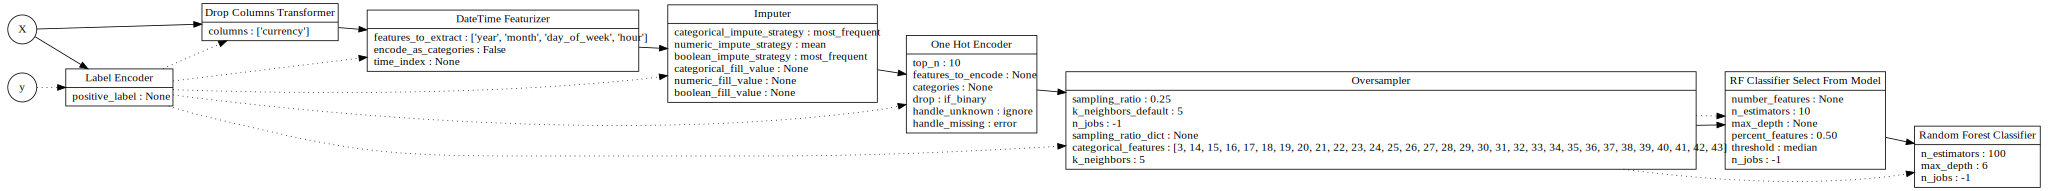

In [42]:
#Visualize the structure of the components contained by the pipeline
pipeline.graph()